## **COPM3602-project / Car Price Anaylsis** 
* [Dataset URL](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)
* [previous analysis on the dataset](https://www.kaggle.com/code/farhanmayyeri/car-price-prediction-elasticnet-grid-search)

#### **1. About Dataset**
>This dataset contains information of ~19000+ cars along with 18 attributes like price, manufacturer, cylinders...etc. The dataset can be used in many applications such as understanding the impact of different specification on car price as well as training ML model to predicte the car price.

#### **2. Attributes Description**

| Attribute | Type | Descriptoin |
| :--- | :--- | :--- |
| ID | Numerical | Car Id from the collected source | 
| Price | Numerical | Car Price | 
| Levy | Numerical | Tax of importing and exporting the cars |
| Manufacturer | Categorical | Company that make the car |
| Model | Categorical | Car Model |
| Prod. year | Numerical | The year the car was made |
| Category | Categorical | The car category/ kind |
| Leather interior | Categorical | If the car seats made of leather |  
| Fuel Type | Categorical | The Type of car Fuel |
| Engine Volume | Numerical | The volume of fuel and air that can be pushed through a car's cylinders |  
| Mileage | Numerical | The number of miles that the car can travel using one gallon or litre of fuel | 
| Cylilnders | Numerical | Numer of Cyilders in the car |
| Gear Box Type | Categorical | The type of the gear box |
| Drive wheels | Categorical | Type of the wheel of a motor vehicle that transmits force |
| Doors | Numerical | Number of the doors |
| Wheel | Categorical | steering | 
| Color | Categorical | Car color |
| Airbags | Numerical | Number of airbags in the car |  


#### **3. bar plot to display the frequency distribution of all attributes**
#### **4. frequency distribution table for continues numerical attributes**
#### **5. Research questions (2-3)**



In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

# Explore the Data

In [2]:
# import the dataset
df = pd.read_csv('car-price.csv')

In [58]:
# take a quick look at the data 
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


In [4]:
df.shape

(19237, 18)

- Alright so we have 19237 observations and 18 attributes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

- It looks like we don't have any missing values, but from ```df.head()``` I can see that there's some missing value in the Levy attribute but they use "**-**" to note the missing value, we gonna change that later
- Engine volume and mileage supposed to be numerical but they are assigned as object, we need to modify that

In [6]:
# see how many missing value we have in the levy column
len(df[df.Levy == '-'])

5819

In [7]:
# replace the - with Nan values
df.Levy.replace({'-' : np.nan}, inplace = True)
# change the Levy data type to float64
df.Levy = df.Levy.astype('float64')

In [8]:
# see why engine volume is object type 
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

- some values have the word Turbo with it, we need to make another column for turbo with two values true or false, then we remove the word turbo from the engine volume column

In [9]:
# see how many cars have turbo
df['Engine volume'].str.contains('Turbo').value_counts()

False    17306
True      1931
Name: Engine volume, dtype: int64

- There's 1931 cars with turbo

In [10]:
# adding a Turbo column 
df['Turbo'] = [True if "Turbo" in x else False for x in df['Engine volume']]

In [11]:
# check the new column 
df.Turbo.value_counts()

False    17306
True      1931
Name: Turbo, dtype: int64

In [12]:
# now we remove the word Turbo from the Engine volume column and convert the type to float64
df['Engine volume'] = df['Engine volume'].str.strip('Turbo').astype('float64')

In [13]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [14]:
# why is mileage assigned as object data type 
df.Mileage.unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

- the Mileage column contains some str "Km" we need to remove that and convert it to int64 data type 

In [15]:
df.Mileage = df.Mileage.str.strip('km').astype('int64')

In [16]:
# see some basic statistics about the numerical attributes 
df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,461.867051,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


1. the ID doesn't mean anything for us, we will dorp it
2. 50 % of the cars in the dataset was made in 2012 or before

In [17]:
# drop the Id column 
df.drop('ID', axis = 1, inplace = True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

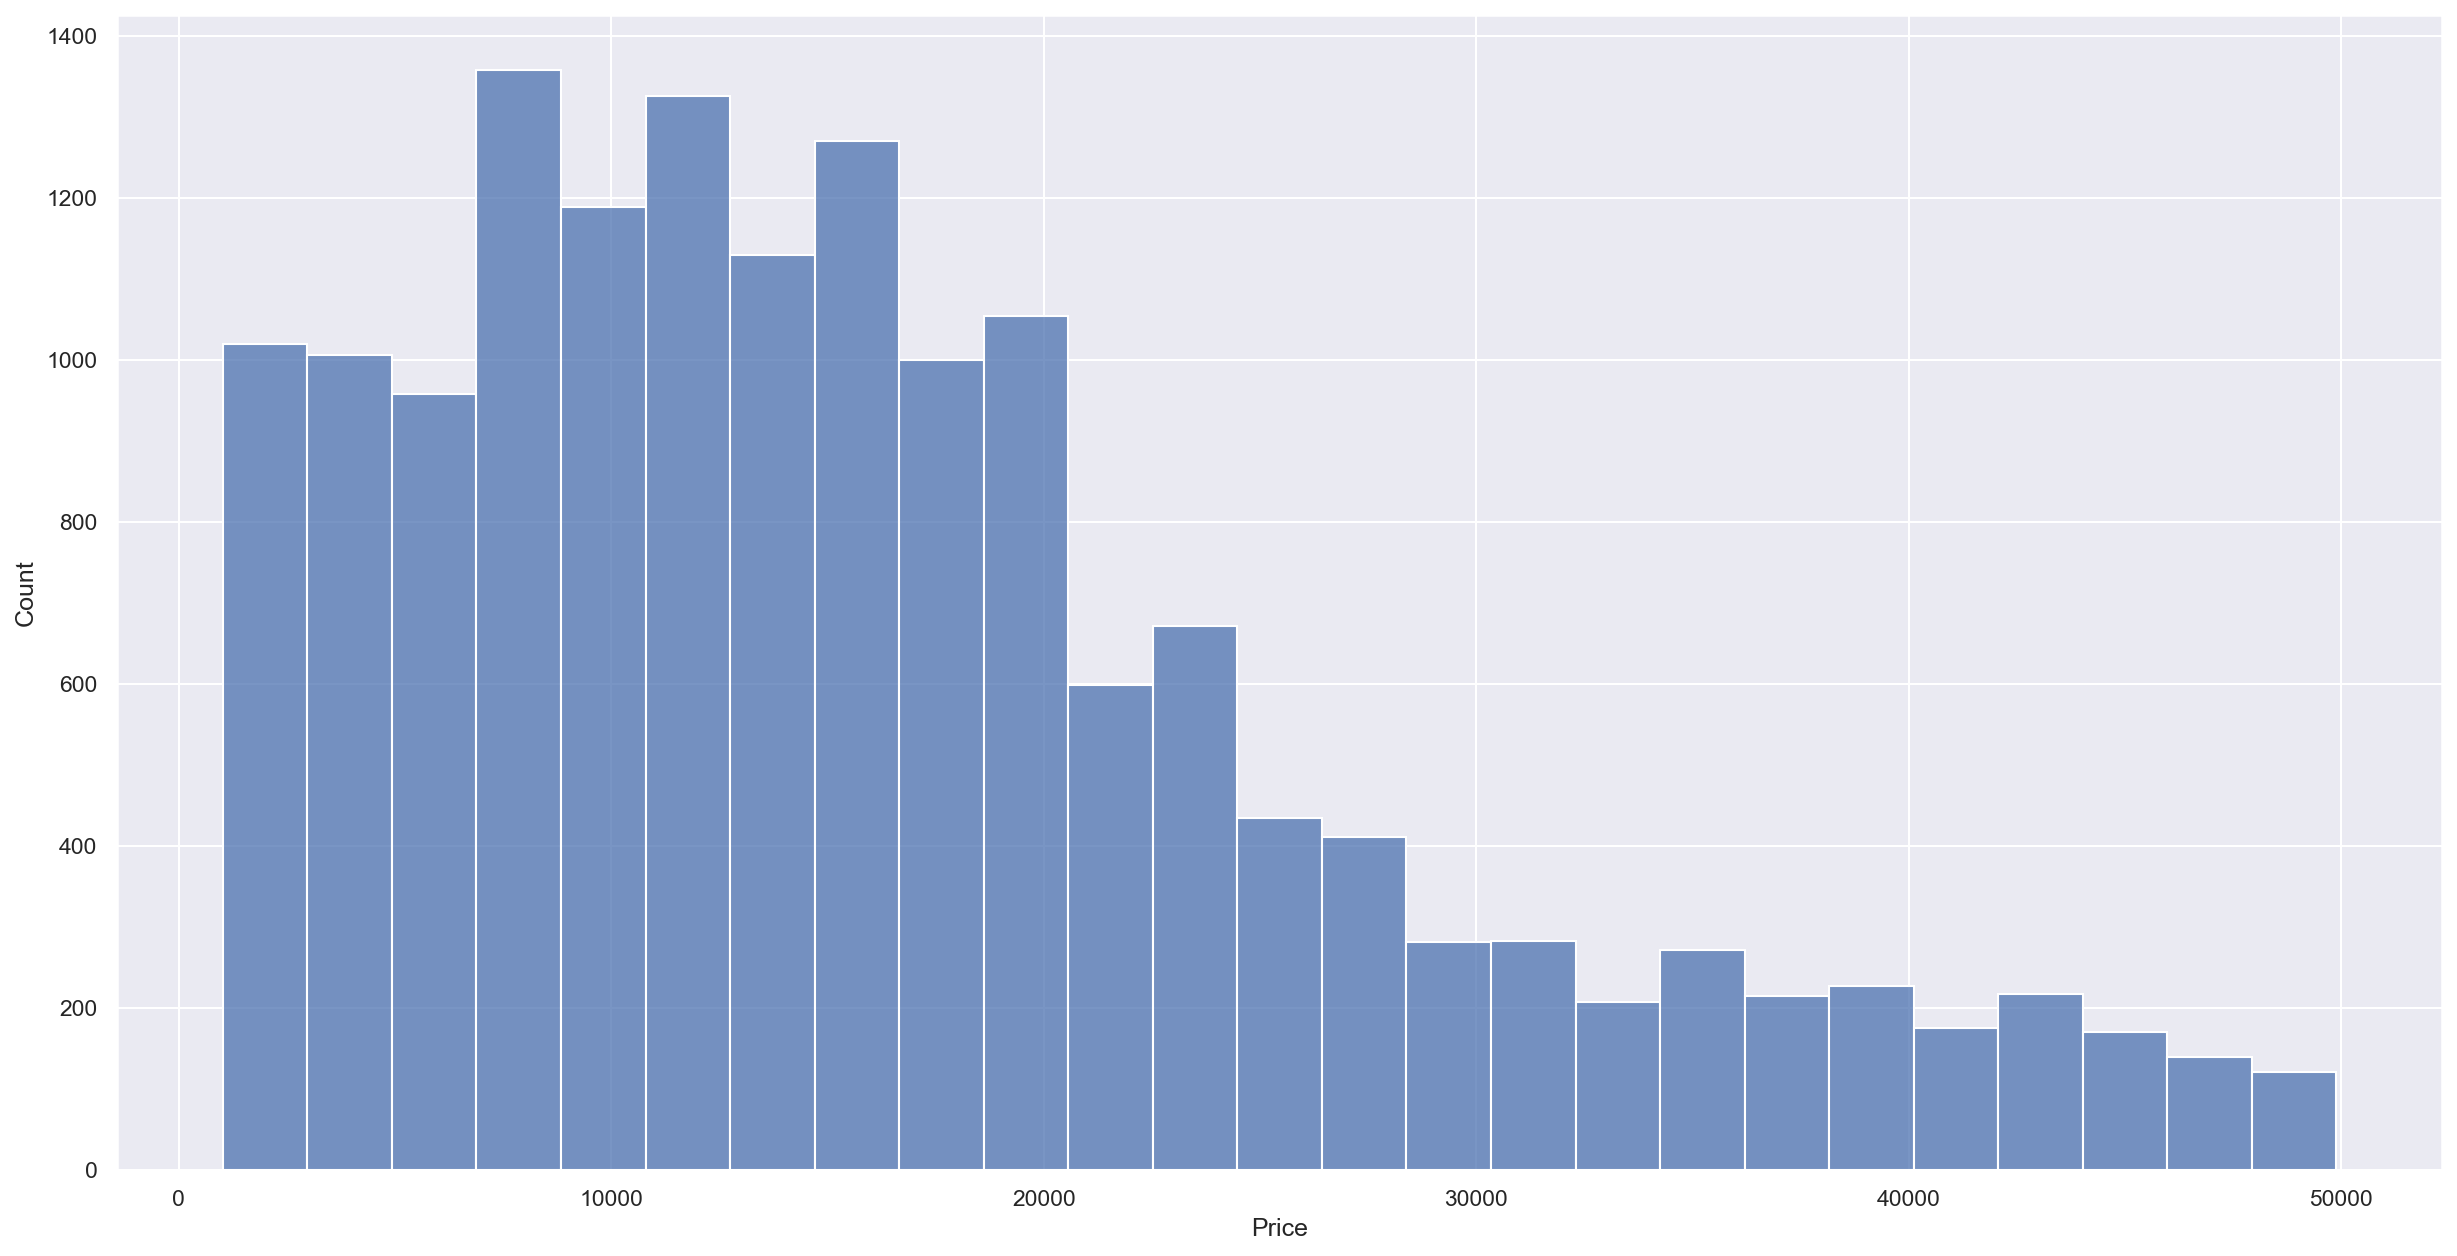

In [73]:
# Plot the prices of the vehicles
plt.figure(figsize=(20,10),dpi=150)
sns.histplot(df[(df.Price > 1000) & (df.Price < 50000)].Price, bins=25)

- This frequency displays the prices of cars that has a range of [1000,50000].

In [75]:
df[df.Price >= 1000].Price.value_counts()

15681    280
14113    244
10976    233
7840     226
12544    225
        ... 
43815      1
41538      1
5378       1
94080      1
22075      1
Name: Price, Length: 2239, dtype: int64

- It is clear that cars with prices of >=10000 is the most common price.

# The frequency distribution of all attributes

In [ ]:
df.Doors.replace({'04-May' : 4, '02-Mar' : 2, '>5' : 4}, inplace = True)

In [ ]:
df.Doors.value_counts()

In [ ]:
df[df['Manufacturer'] == 'TESLA']